### Projectile Motion

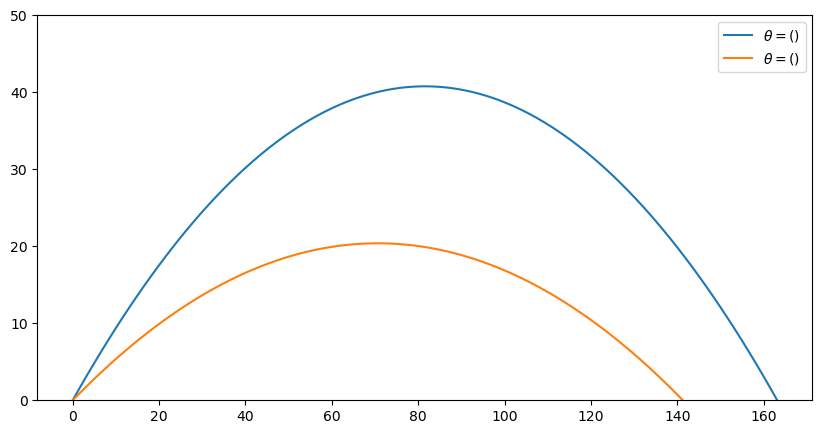

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import sin,cos,pi

u0 = 40 # the projectile velocity
g = 9.81 # gravity

theta1 = 45 # projectile angle
theta2 = 30

ux1 = u0*cos(theta1*pi/180)
uy1 = u0*sin(theta1*pi/180)

ux2 = u0*cos(theta2*pi/180)
uy2 = u0*sin(theta2*pi/180)

t_total_1 = 2*uy1/g
t_total_2 = 2*uy2/g

t1 = np.linspace(0,t_total_1,100)
t2 = np.linspace(0,t_total_2,100)

sx1 = ux1*t1
sy1 = (uy1*t1)-(0.5*g*t1**2)
sx2 = ux2*t2
sy2 = (uy2*t2)-(0.5*g*t2**2)

plt.figure(figsize=(10,5))
plt.plot(sx1,sy1, label=r'$\theta=()$'.format(theta1)) #formating not working
plt.plot(sx2,sy2, label=r'$\theta=()$'.format(theta2))
plt.ylim(0,50)
plt.legend()
plt.show()

### Failure Theory

<function matplotlib.pyplot.show(close=None, block=None)>

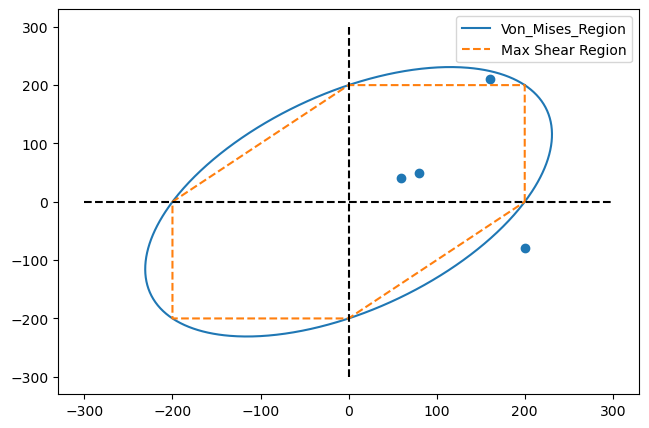

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import sin,cos,pi

Syt = 200 # yield strength
S1 = 150  # stress in dir 1
S2 = 80   # stress in dir 2

Sv = np.sqrt(S1**2 - (S1*S2) + S2**2)

a = 2**0.5*Syt     # Semi major axis of elipse
b = (2/3)**0.5*Syt # Semi minor axis of elipse

theta = np.linspace(0,360*pi/180,720)

x = a*cos(theta) # original points
y = b*sin(theta)

Sp1 = [200,160,80,60]
Sp2 = [-80,210,50,40]

rot_angle = pi/4

xd = x*cos(rot_angle) - y*sin(rot_angle)
yd = x*sin(rot_angle) + y*cos(rot_angle)

px1 = [-300,300]
py1 = [0,0]
px2 = [0,0]
py2 = [-300,300]

xp = [Syt,Syt,0,-Syt,-Syt,0,Syt]
yp = [0,Syt,Syt,0,-Syt,-Syt,0]
plt.figure(figsize=(7.5,5))
plt.plot(xd,yd,label="Von_Mises_Region")
plt.plot(xp,yp,linestyle='--',label='Max Shear Region')
plt.plot(px1,py1,linestyle='--',color='black')
plt.plot(px2,py2,linestyle='--',color='black')

plt.scatter(Sp1,Sp2)
plt.legend()
plt.show

### Shear Force and Bending Moment Diagram

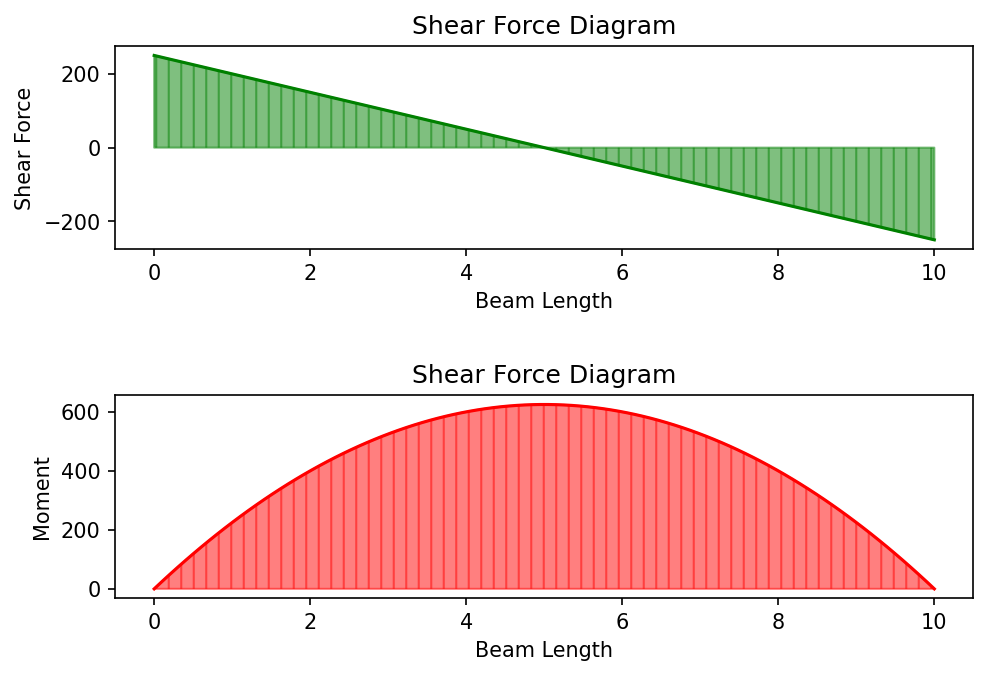

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# inputs
L = 10 # length of beam (m)
w = 50 # N/m

# reactions
R = w*L/2
x = np.linspace(0,L,100) 

X = [] # intervals for beam length
SF = [] # Shear force
M = [] # moment

for l in x:
    sf = R - (w*l) 
    m = (R*l) - (w*l**2/2) 
    X.append(l)
    SF.append(sf)
    M.append(m)

plt.figure(figsize=(7.5,5),dpi=150)
plt.subplot(2,1,1) # 2 rows, 1 column, plot 1
plt.plot(X,SF,color="green")
plt.fill_between(X,SF,color='green',alpha=0.5,hatch='||')
plt.title("Shear Force Diagram")
plt.ylabel("Shear Force")
plt.xlabel("Beam Length")
plt.tight_layout(pad=4)

plt.subplot(2,1,2) # 2 rows, 1 column, plot 2
plt.plot(X,M,color='red')
plt.fill_between(X,M,color='red',alpha=0.5,hatch='||')
plt.title("Shear Force Diagram")
plt.ylabel("Moment")
plt.xlabel("Beam Length")

plt.show()



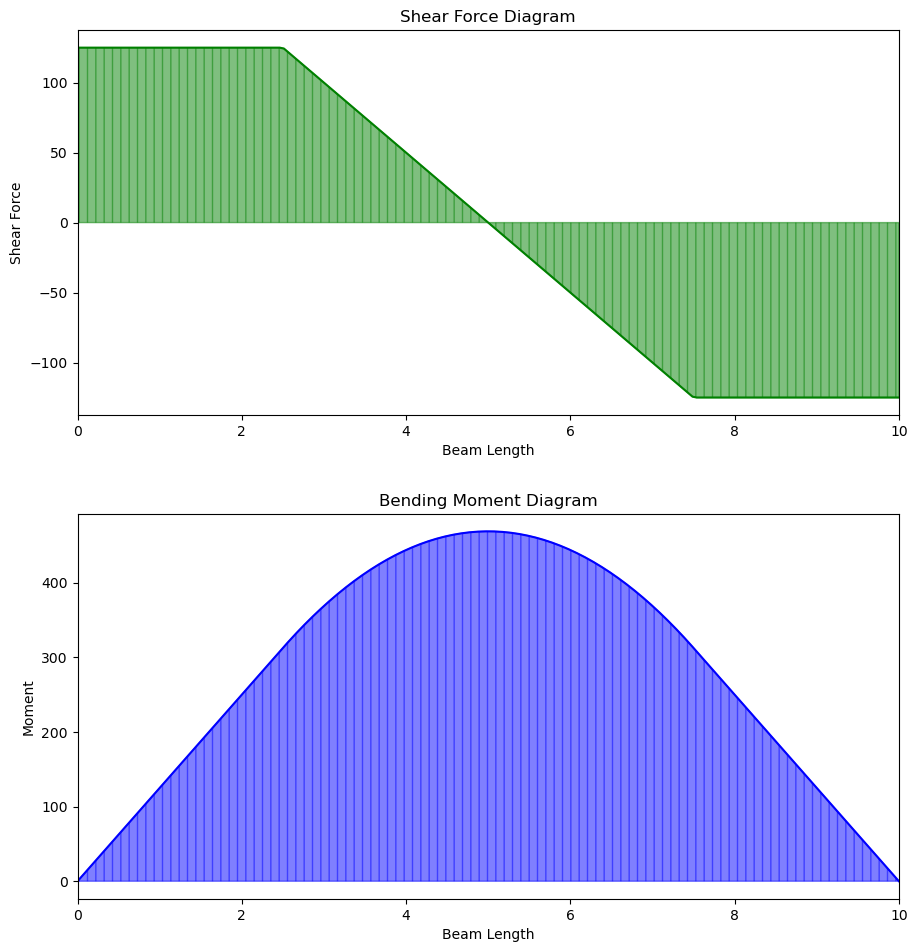

In [31]:
import numpy as np
import matplotlib.pyplot as plt

w = 50 # udl N/m
L = 10 # length of beam (m)

a = 2.5
b = 5
c = L-(a+b)

# Reactions
R1 = (w*b/L)*(c + b/2)
R2 = (w*b/L)*(a + b/2)
l = np.linspace(0,L,200)

X = []
SF = []
M = []

for x in l:
    if x < a:
        sf = R1
        m = R1*x

    elif a < x < (a+b):
        sf = R1 - w*(x-a)
        m = (R1*x) - w*(x-a)**2/2

    elif x > (a+b):
        sf = -R2
        m = R2*(L-x)

    X.append(x)
    SF.append(sf)
    M.append(m)

plt.figure(figsize=(10,10),dpi=100)

plt.subplot(2,1,1)
plt.plot(X,SF,color='green')
plt.fill_between(X,SF,color='green',alpha=0.5,hatch='||')
plt.title("Shear Force Diagram")
plt.ylabel("Shear Force")
plt.xlabel("Beam Length")
plt.tight_layout(pad=4)
plt.xlim(0,L)

plt.subplot(2,1,2)
plt.plot(X,M,color='blue')
plt.fill_between(X,M,color='blue',alpha=0.5,hatch='||')
plt.title("Bending Moment Diagram")
plt.ylabel("Moment")
plt.xlabel("Beam Length")
plt.xlim(0,L)

plt.show()


### Fatigue Criteria

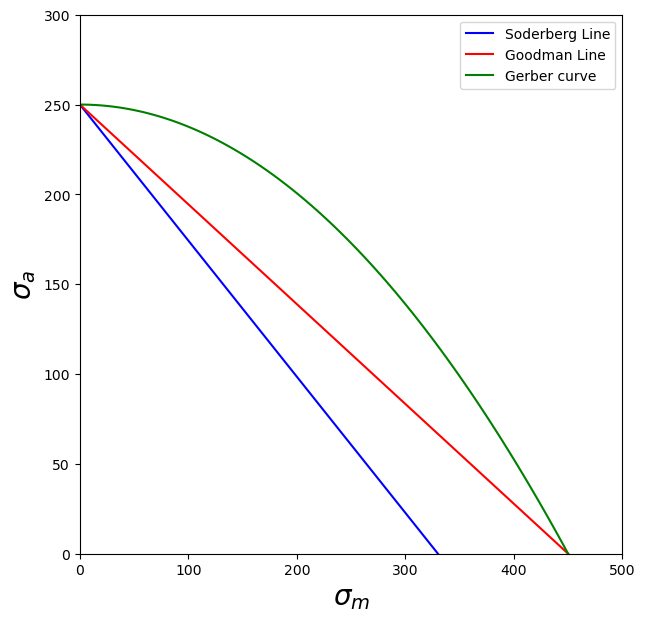

In [58]:
import numpy as np
import matplotlib.pyplot as plt

#inputs
Sm = 200
Sa = 250

Sut = 450
Syt = 330
Se = 250

plt.figure(figsize=(7,7))
def soderberg(syt,se):
    # plt.plot([x1,x2],[y1,y2])
    plt.plot([syt,0],[0,se],label='Soderberg Line', color='blue')
    plt.legend()
    plt.xlim(0,Sut+50)
    plt.ylim(0,Se+50)
    plt.xlabel(r'$\sigma_m$',fontsize=20)
    plt.ylabel(r'$\sigma_a$',fontsize=20)
    return

def goodman(sut,se):
    plt.plot([sut,0],[0,se],label='Goodman Line', color='red')
    plt.legend()
    return

def gerber(sm,sut,se):
    sm = np.linspace(0,sut,100)
    sa = se*(1 - (sm/sut)**2)
    plt.plot(sm,sa,color='green', label='Gerber curve')
    plt.legend()
    return

(soderberg(Syt,Se),goodman(Sut,Se),gerber(Sm,Sut,Se))
plt.show()
